1Пусть дана начальная популяция из четырех хромосом с двумя генами x и y. Показатель качества хромосомы оценивается функцией Z. При равном качестве хромосом предпочтение отдается хромосоме с большим номером. На каждом этапе хромосома a с высшим качеством порождает четыре новых хромосомы b_1,c_1,b_2,c_2, обмениваясь генами с двумя хромосомами b и c более низкого качества по указанной схеме:


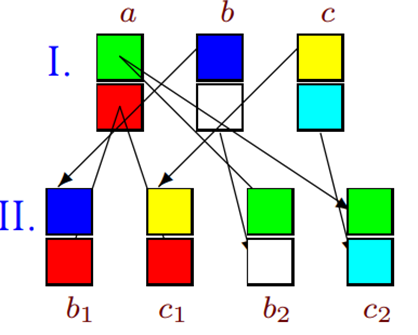 

Последняя хромоcома (с низшим качеством) выбывает из популяции. Найти максимальный показатель качества хромосомы в популяции и общее качество популяции после четырех этапов эволюции.

In [2]:
#функция качества хромосомы
def qZ(x, y):
    return (x - 3 * y + 1) / (3 * x ** 2 + 3 * y ** 2 + 1)
#сумма качества хромосом
def qSumZ(Z):
    return sum(Z)

def exchangeScheme(oldX, oldY, sortedId):
    x = [0 for i in range(4)]
    y = [0 for i in range(4)]
    
    x[2] = oldX[sortedId[2]]
    x[3] = oldX[sortedId[2]]
    
    x[0] = oldX[sortedId[0]]
    
    x[1] = oldX[sortedId[1]]
    
    y[0] = oldY[sortedId[2]]
    y[1] = oldY[sortedId[2]]
    
    y[2] = oldY[sortedId[0]]
    
    y[3] = oldY[sortedId[1]]
    
    return x, y

def sorting(Z):
    sortedId = sorted(range(len(Z)), key=lambda k: Z[k])
    return sortedId

#шаг эволюции
def evoStep(x, y, z):
    _, minId = min((value, id) for (id, value) in enumerate(z))
    x = x[:]
    y = y[:]
    z = z[:]
    
    x.pop(minId)
    y.pop(minId)
    z.pop(minId)
    
    return x, y, z

#шаги эволюции (конечная функция), по умолчанию 4 шага
def evoSteps(x, y, steps_num=4):
    results = []
    
    for i in range(steps_num):
        arrZ = [qZ(k, y[i]) for i, k in enumerate(x)]
        
        x, y, z = evoStep(x, y, arrZ)
        
        x, y = exchangeScheme(x, y, sorting(z))
        
        results.append([x, y, qSumZ(arrZ), arrZ])
    
    return x, y, results

#объявление массивов хромосом
x = [-2, -1, 0, 1]
y = [-2, -1, 0, 1]

results = evoSteps(x, y)

for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z: {max(qualityArrZ)}')

max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z: 1.0


ЗАДАНИЕ 1 
ВАРИАНТ 6
Выполните по вариантам соответственно реализацию генетического
алгоритма в соответствии с приложенными начальными данными.

In [3]:
#Функция качества хромосом 
def qZ(x,y):
    return (x + 3 * y) / (x ** 2 + y ** 2 + 1) #6 вариант

#Сумма качества хромосом
def qsumZ(Z):
    return sum(Z)

#обмен хромосомами
def exchangeScheme(oldX, oldY, sortedId): 
    X = [0 for i in range(4)] 
    Y = [0 for i in range(4)]
    print(oldX)
    X[2] = oldX[sortedId[2]] 
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]] 
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]

    Y[3] = oldY[sortedId[1]]

    return X, Y

# сортировка массива по качеству потомков
def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
    return sortedId

# 1 Шаг эволюции
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z)) 
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X, Y, Z

# Шаги эволюции
def evoSteps(X, Y, stepsNum = 6): 
    results = []

    for i in range(stepsNum): 
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]

        X,Y,Z = evoStep(X, Y, arrZ)

        X, Y = exchangeScheme(X, Y, sorting(Z))

        results.append([X, Y, qsumZ(arrZ), arrZ])

    return X, Y, results

#объявление массивов хромосом
X = [-5,-3,-2,-1] #6 вариант
Y = [-1,-2,0,1]

#реализация алгоритма
results = evoSteps(X,Y)

for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = [] 
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
print(f'max Z: {max(qualityArrZ)}')

[-5, -2, -1]
[-2, -5, -1]
[-1, -5, -2]
[-2, -1, -1]
[-1, -1, -1]
[-1, -1, -1]
max_1_step: -0.6724867724867726
max_2_step: -1.7407407407407407
max_3_step: 0.35925925925925917
max_4_step: 1.4259259259259258
max_5_step: 2.1666666666666665
max_6_step: 2.6666666666666665
max Z: 0.6666666666666666


1.2.1 ПРИМЕР
Итак, начальные условия задачи представляют собой следующий граф с расстояниями между ребрами:
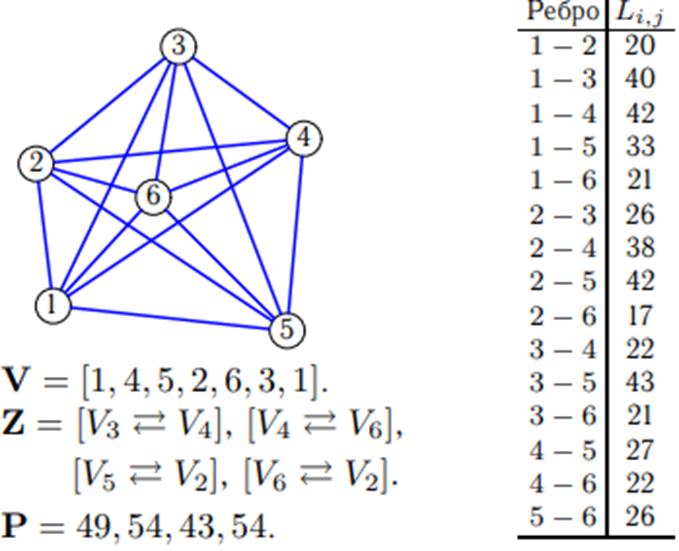

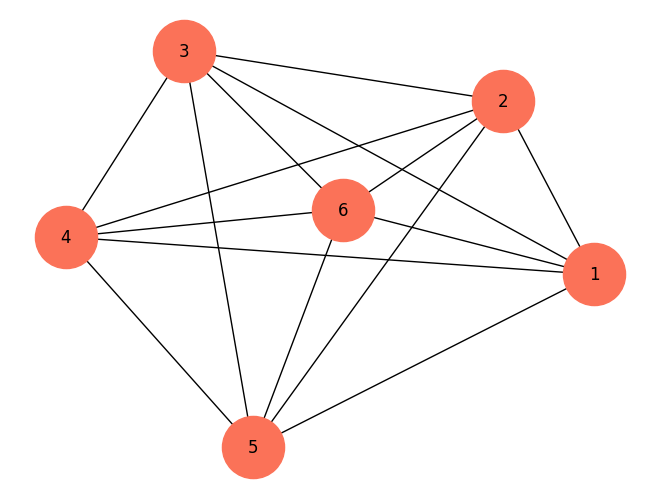

In [4]:
import networkx as nx
from math import e

distances = [(1, 2, 20),
            (1, 3, 40),
            (1, 4, 42), 
            (1, 5, 33),
            (1, 6, 21),
            (2, 3, 26),
            (2, 4, 38),
            (2, 5, 42),
            (2, 6, 17),
            (3, 4, 22),
            (3, 5, 43),
            (3, 6, 21),
            (4, 5, 27),
            (4, 6, 22),
            (5, 6, 26)] #длины рёбер

V = [1, 4, 5, 2, 6, 3, 1] #последовательность прохождения маршрута
Z = [(3, 4),
    (4, 6),
    (5, 2),
    (6, 2)] #последовательность замен вершин
P = [49, 54, 43, 54] #случайные числа, выпавшие в процессе счёта

T = 100 #начальная температура

#функция вероятности
def probability(delta, T):
    return 100 * e ** (-delta / T)

#функция изменения температуры
def reductTemp(prevT):
    nextT = .5 * prevT
    return nextT

graph = nx.Graph() #создание пустого графа
graph.add_weighted_edges_from(distances) #добавление весов рёбер

#отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

Лучший выбранный маршрут: [1, 6, 2, 3, 4, 5, 1]
Длина лучшего выбранного маршрута: 146
Длины всех рассмотренных маршрутов: [189, 209, 186, 146, 166]


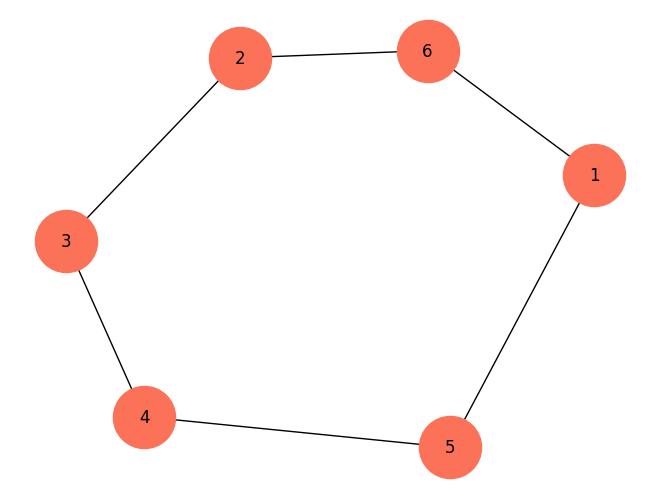

In [5]:
#вычисление длины ребра
def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                   for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

#вычисление длины маршрута
def routeLength(V, distances):
    edges = []
    
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
    
    return sum(edges)

#одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    
    return arrV

#перестановка в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

#выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) #нахождение длины пути
    arrSum = [sumLength] #массив сумм длин
    
    #циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) #новый маршрут после перестановки
        newS = routeLength(newV, distances) #длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength #разница между длиной нового и старого маршрутов
        
        #в случае, если разница между длинами больше 0, то вычисляется вероятность
        if deltaS > 0:
            p = probability(deltaS, T) #подсчёт вероятности
            
            #если заданная вероятность попадает в интервал от 0 до p, то новый маршрут выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
            
        T = reductTemp(T) #вычисление температуры
    
    return V, arrSum

#отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    #прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
    
    graph = nx.Graph() #создание пустого графа
    
    graph.add_weighted_edges_from(newDistances) #добавление весов рёбер
    #отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)
    
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) #отрисовка лучшего маршрута

ЗАДАНИЕ 2 ВАРИАНТ 6 Найти длину гамильтонова цикла S4 в полном графе K6 после четырех
циклов решения задачи методом отжига по вариантам ниже

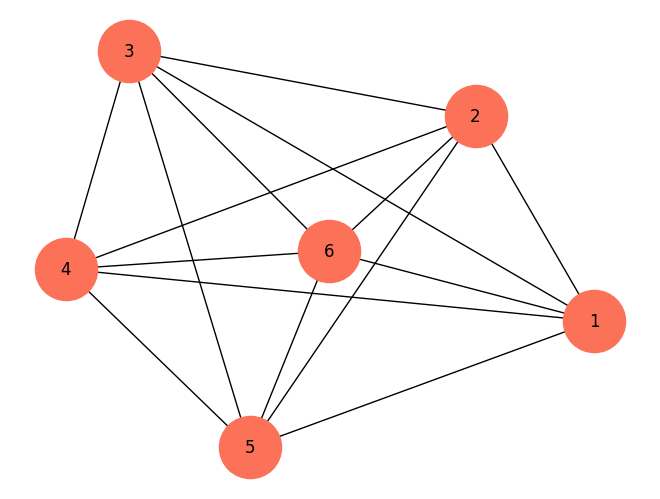

In [13]:
import networkx as nx 
from math import e

distances = [(1, 2,22),
            (1, 3, 43),
            (1, 4, 39),
            (1, 5, 28),
            (1, 6, 20),
            (2, 3,26),
            (2, 4, 33),
            (2, 5, 36),
            (2, 6, 17),
            (3, 4, 22),
            (3, 5, 40),
            (3, 6, 24),
            (4, 5, 22),
            (4, 6, 19),
            (5, 6, 20)] # длины рёбер
V = [1, 3, 4, 5, 6, 2 ,1] # последовательность прохождения маршрута
Z = [(2,4),
    (4, 6),
    (3,5),
    (5,2)] # последовательность замен вершин 
P = [51,23,29,31] # случайные числа, быпавшие в процессе счёта
T = 100 # начальная температура

# функция бероятности
def probability(delta, T): 
    return 100 * e ** (-delta / T)

# функция изменения температуры 
def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT

graph = nx.Graph() # создание пустого графа 
graph.add_weighted_edges_from(distances) # добавление весов рёбер

# отрисовка графа с заданными бершинами 
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)



In [14]:
# вычисление длины ребра
def edgeLength(i, j, distances, roundTrip = True): 
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) 
                    for item in distances])
    else: 
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

In [15]:
# вычисление длины маршрута
def routeLength(V, distances): 
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
        
    return sum(edges)

In [16]:
# одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

# перестановки в пути 
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

In [17]:
# быбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P): 
    sumLength = routeLength(V, distances) # нахождение длины numa
    arrSum = [sumLength] # массиб сумм длин

    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый марирут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута 
        arrSum.append(newS) 
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов

        # в случае, если разница между длинами больше 0, то вычисляется вероятность 
        if deltaS > 0:
            p = probability(deltaS, T) # подсчет вероятности
            
            # если заданная вероятность попадает в интердал от 0 до р, то новый маршрут выбирается 
            if p > P[i]: 
                V = newV 
                sumLength = newS
        else: 
            V = newV 
            sumLength = newS
        T = reductTemp(T) # вычисление температуры
    
    return V, arrSum

Лучший выбранный маршрут: [1, 5, 6, 2, 4, 3, 1]
Длина лучшего выбранного маршрута: 163
Длины всех рассмотренных маршрутов: [146, 135, 167, 163, 194]


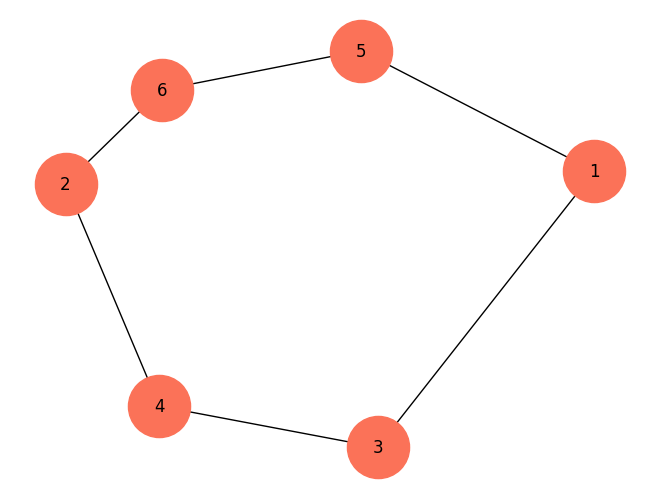

In [18]:
# отрсовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = [] 
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]: 
                newDistances.append(distance)

    graph = nx.Graph() # создание пустого графа

    graph.add_weighted_edges_from(newDistances) # добабление весоб ребер 
    #отрисовка графа с заданными вершинами 
    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}') 
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}') 
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances,bestRoute)